In [138]:
import pickle
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten
from keras.optimizers import Adam,RMSprop
from keras.models import Model

In [139]:
with open("pickle_data/images.p","rb") as f:
  images = pickle.load(f)

with open("pickle_data/labels.p","rb") as f:
  labels = pickle.load(f)

In [140]:
print(images.shape)
print(labels.shape)
print(set(labels))

(400, 100, 100)
(400,)
{'Swaptik-ID-10004', 'Mallika-ID-10002', 'Mahua-ID-10003', 'Anoushka-ID-10001'}


In [141]:
le = LabelEncoder()
labels = le.fit_transform(labels)

In [142]:
print(set(labels))

{0, 1, 2, 3}


In [143]:
n_classes = len(set(labels))
label_mapping = le.inverse_transform(np.arange(n_classes))
print(label_mapping)

['Anoushka-ID-10001' 'Mahua-ID-10003' 'Mallika-ID-10002'
 'Swaptik-ID-10004']


In [144]:
for i in range(n_classes):
  print("person {} is {}".format(i,le.inverse_transform([i])))

person 0 is ['Anoushka-ID-10001']
person 1 is ['Mahua-ID-10003']
person 2 is ['Mallika-ID-10002']
person 3 is ['Swaptik-ID-10004']


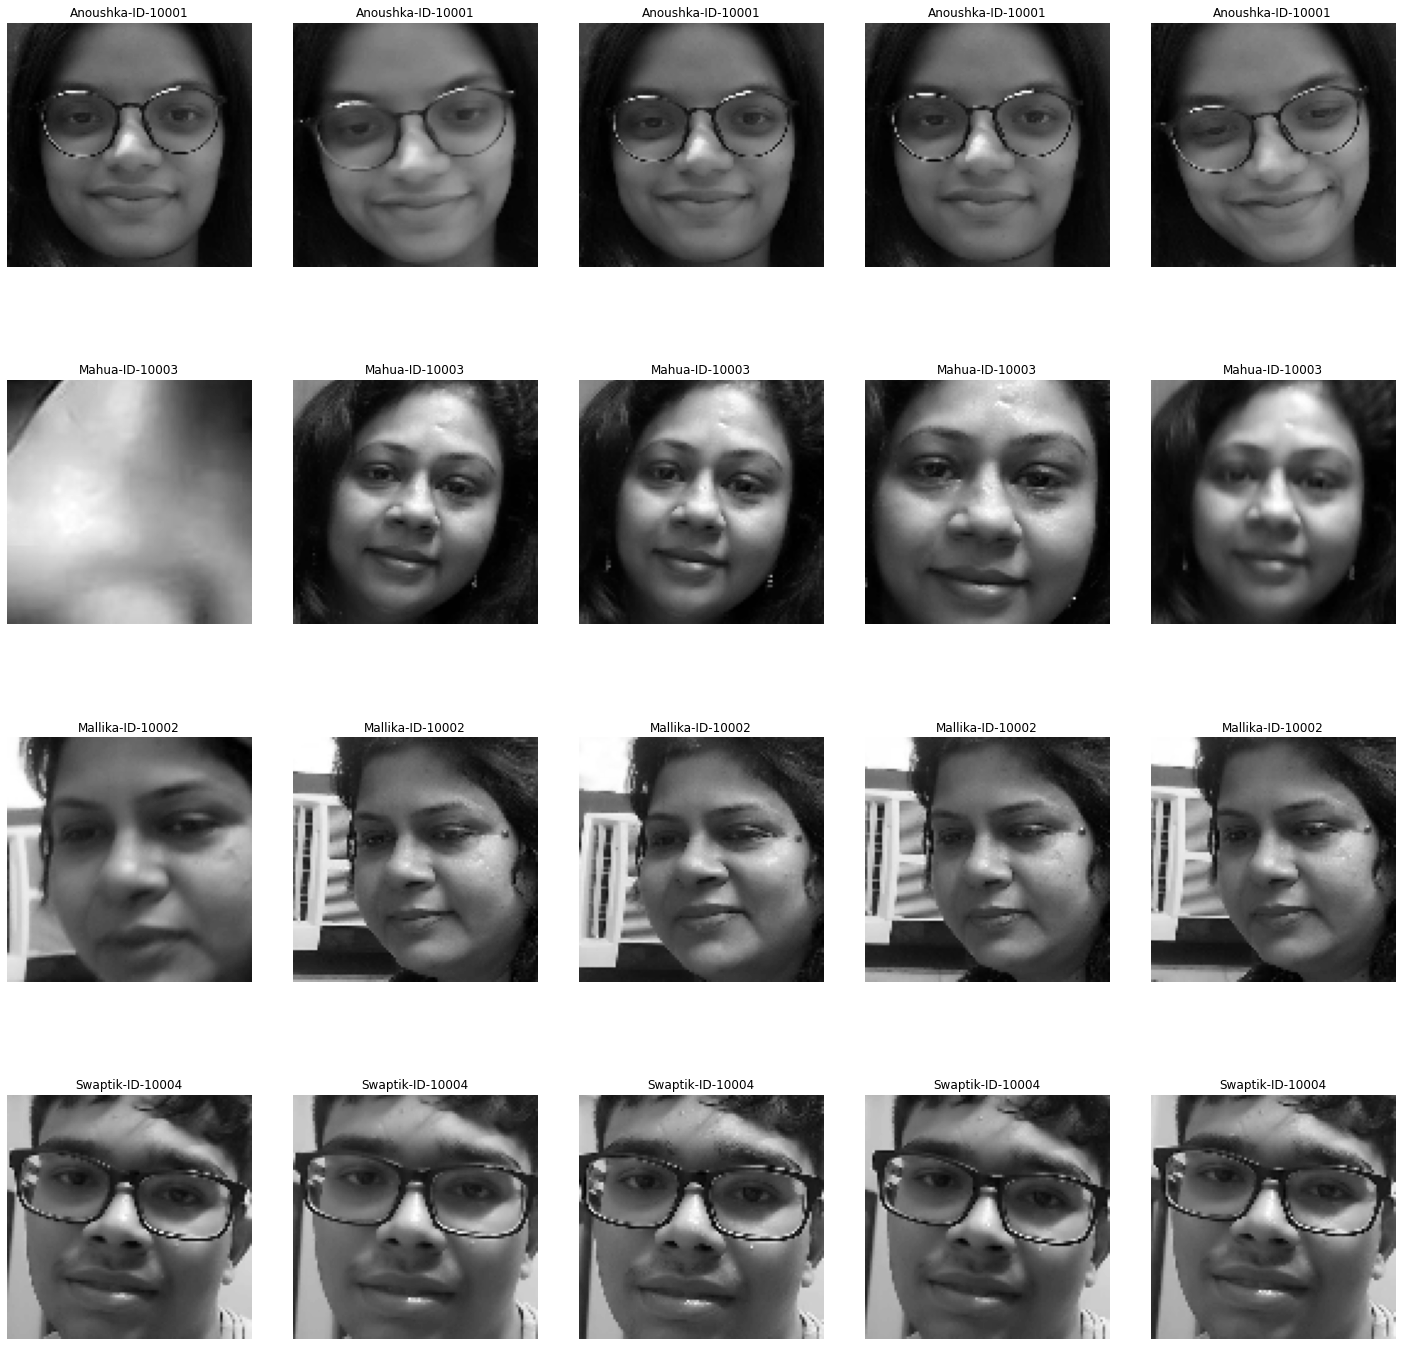

In [145]:
fig,axes = plt.subplots(nrows=n_classes,ncols=5,figsize=(20,20))
fig.tight_layout()

for i in range(n_classes):

  for j in range(5): 
    axes [i][j].imshow(images[labels==i][np.random.randint(0,len(images[labels==i]))],cmap="gray")
    axes[i][j].axis("off")
    axes[i][j].set_title(label_mapping[i])

In [146]:
def preprocess(img):
  img = img.reshape(100,100,1)
  img = img/255
  return img

In [147]:
images = np.array(list(map(preprocess,images)))

In [148]:
print(images.shape)

(400, 100, 100, 1)


In [149]:
xtr,xts,ytr,yts = train_test_split(images,labels,test_size=0.1,random_state=0)

In [150]:
ytr = to_categorical(ytr,n_classes)
yts = to_categorical(yts,n_classes)

In [151]:
model = Sequential()
model.add(Conv2D(32,(5,5),input_shape=(100,100,1),strides=2,activation="relu"))
model.add(Conv2D(32,(5,5),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,(3,3),activation="relu"))
model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())

model.add(Dense(512,activation="relu"))
model.add(Dense(216,activation="relu"))
model.add(Dense(n_classes,activation="softmax"))
model.compile(RMSprop(learning_rate=1e-4),loss=["categorical_crossentropy"],metrics = ["accuracy"])

In [152]:
print(model.summary())

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 48, 48, 32)        832       
                                                                 
 conv2d_25 (Conv2D)          (None, 44, 44, 32)        25632     
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 22, 22, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 20, 20, 64)        18496     
                                                                 
 conv2d_27 (Conv2D)          (None, 18, 18, 64)        36928     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 9, 9, 64)         0         
 g2D)                                                 

In [153]:
model.fit(xtr,ytr,epochs=25,verbose=1,validation_data=(xts,yts))

Epoch 1/25
12/12 [==============================] - 11s 740ms/step - loss: 1.2302 - accuracy: 0.5917 - val_loss: 0.9126 - val_accuracy: 0.5500
Epoch 2/25
12/12 [==============================] - 8s 665ms/step - loss: 0.6392 - accuracy: 0.8500 - val_loss: 0.4663 - val_accuracy: 0.7250
Epoch 3/25
12/12 [==============================] - 5s 368ms/step - loss: 0.2369 - accuracy: 0.9333 - val_loss: 0.2452 - val_accuracy: 0.9750
Epoch 4/25
12/12 [==============================] - 4s 345ms/step - loss: 0.1745 - accuracy: 0.9444 - val_loss: 0.1387 - val_accuracy: 0.9750
Epoch 5/25
12/12 [==============================] - 4s 350ms/step - loss: 0.0906 - accuracy: 0.9750 - val_loss: 0.2296 - val_accuracy: 0.9250
Epoch 6/25
12/12 [==============================] - 4s 342ms/step - loss: 0.0823 - accuracy: 0.9861 - val_loss: 0.1228 - val_accuracy: 0.9750
Epoch 7/25
12/12 [==============================] - 4s 354ms/step - loss: 0.0382 - accuracy: 0.9972 - val_loss: 0.1136 - val_accuracy: 0.9250
Epoch

In [160]:
layer0 = Model(model.layers[0].input,model.layers[0].output)

In [162]:
features = layer0.predict(xts[0].reshape(1,100,100,1))

1/1 [==============================] - 0s 45ms/step


In [163]:
features.shape

(1, 48, 48, 32)

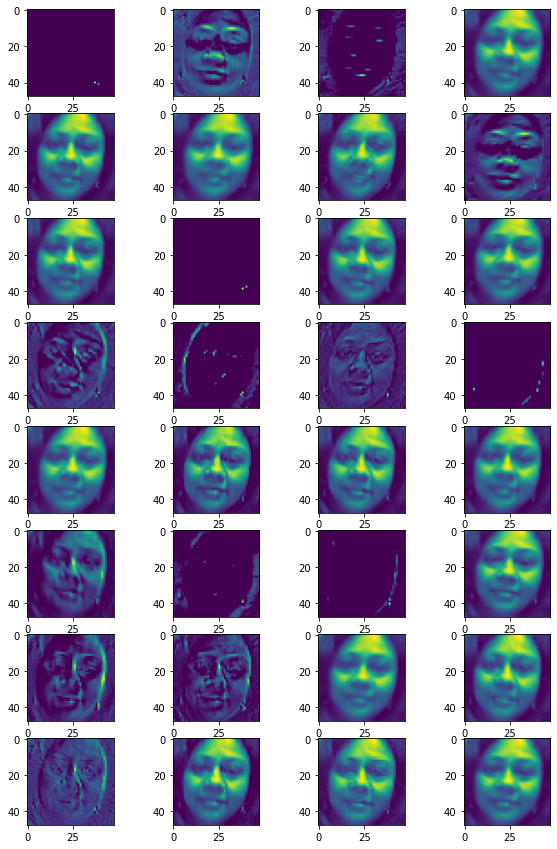

In [164]:
plt.figure(figsize=(10,15))
for i in range(32):
  axes = plt.subplot(8,4,i+1)
  plt.imshow(features[0,:,:,i])

In [165]:
model.save("FACE-DETECT.h5")